# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lecture 1, Exercise 1: The Data Science Process


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

---

## Название :
Упражнение: Процесс науки о данных

## Описание :
Целью данного упражнения является понимание всех этапов процесса Data Science.

## Описание данных:
Hubway - это общественная программа совместного использования велосипедов в Бостоне, включающая более 1600 велосипедов на 160+ станциях в районе Большого Бостона. Hubway принадлежала четырем муниципалитетам района.

К 2016 г. программа Hubway насчитывала 185 станций и 1750 велосипедов, а с момента запуска в 2011 г. она совершила 5 млн поездок.

В апреле 2017 года компания Hubway провела конкурс по визуализации данных в центре Microsoft NERD в Кембридже, опубликовав данные о поездках за 5 лет.

## Инструкции:
- Считайте файлы данных hubway_stations.csv и hubway_trips.csv в отдельные фреймы данных pandas.
- Получите краткое представление о присутствующих в данных столбцах и их типах.
- Удалите все точки данных с нулевыми значениями в одном (или нескольких) столбцах.
- Создайте новый столбец age, в котором будет указан возраст велосипедиста по дате его рождения.
- Выполните соответствующую EDA, чтобы ответить на вопросы, заданные на эшафоте.
- Создайте простую линейную модель для предсказания количества выездов в зависимости от удаленности велосипедов от центра города.
- Визуализировать прогноз в сравнении с данными.

## Hints: 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Возвращает фрейм данных pandas, содержащий данные и метки из файла данных

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html?highlight=describe#pandas.Series.describe" target="_blank">pd.describe()</a> 
Генерирует описательную статистику фрейма данных.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna" target="_blank">pd.dropna()</a>
Удаляет пропущенные значения из фрейма данных. При этом удаляются либо столбцы, либо строки в зависимости от параметра axis.

In [1]:
# Импортируем все необходимое
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
# читаем "hubway_stations.csv"
stations = pd.read_csv("hubway_stations.csv")

# читаем "hubway_trips.csv"
trips = pd.read_csv("tripsthrough.csv")


In [3]:
# проверяем
stations.head()


,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [4]:
# проверяем
trips.head()


,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,2011-07-28 10:12:00,23.0,2011-07-28 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,2011-07-28 10:21:00,23.0,2011-07-28 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,2011-07-28 10:33:00,23.0,2011-07-28 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,2011-07-28 10:35:00,23.0,2011-07-28 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,2011-07-28 10:37:00,23.0,2011-07-28 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


### **Понимание данных**

Важно полностью понять всю информацию, представленную в данных.Первый шаг для этого - поближе познакомиться со всеми столбцами и понять их типы данных.

In [5]:
# просмоттрим типы данных фрейма данных станции
stations.dtypes


id             int64
terminal      object
station       object
municipal     object
lat          float64
lng          float64
status        object
dtype: object

In [6]:
# просмотрим типы данных во фрейме поездки
trips.dtypes


seq_id          int64
hubway_id       int64
status         object
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
bike_nr        object
subsc_type     object
zip_code       object
birth_date    float64
gender         object
dtype: object

### ⏸ Основываясь на данных, видите ли вы какие -либо возможные проблемы?

In [7]:
### edtest (test_chow0) ###
# Отправьте вопросы в качестве строки ниже.Разделите каждый вопрос эротема (знак вопроса)
answer0 = 'Yes'
# birth_date    float64
# zip code '97217 - апострофы?
# end_statn - float 
# Проблемы которые необходимо устранить

## Получим описательную статистику фреймов

In [8]:
stations.describe()


,id,lat,lng
count,142.000000,142.000000,142.000000
mean,74.323944,42.354820,-71.089087
std,41.389098,0.020089,0.027111
min,3.000000,42.309467,-71.146452
25%,39.250000,42.341652,-71.113183
50%,74.500000,42.353373,-71.089191
75%,109.750000,42.366265,-71.065210
max,145.000000,42.404490,-71.035705


In [9]:
trips.describe()


,seq_id,hubway_id,duration,strt_statn,end_statn,birth_date
count,674350.000000,674350.000000,6.743500e+05,674336.000000,674305.000000,350644.000000
mean,337175.500000,381806.766276,1.560357e+03,41.175871,41.054369,1976.295322
std,194668.221352,219696.069920,4.028090e+04,23.326194,23.198199,10.999742
min,1.000000,8.000000,-6.660000e+03,3.000000,3.000000,1932.000000
25%,168588.250000,191560.500000,4.050000e+02,22.000000,22.000000,1969.000000
50%,337175.500000,382518.500000,6.630000e+02,40.000000,40.000000,1979.000000
75%,505762.750000,571534.750000,1.161000e+03,54.000000,54.000000,1985.000000
max,674350.000000,761917.000000,1.199446e+07,141.000000,141.000000,1995.000000


### ⏸ Основываясь на вашем понимании данных, на какие вопросы вы хотели бы ответить?

In [10]:
### edtest (test_chow1) ###
# Отправьте вопросы в качестве строки ниже.Разделите каждый вопрос эротема (знак вопроса)
answer1 = 'Наиболее распространенная станция, которая на которой самая большая нагрузка, то есть больше всего поездок?' 
answer2 = 'кто чаще ездит мужчина или женщина?'
answer3 = 'На этой станциии люди какого возраста?'


### **Предварительная обработка данных**

Давайте очистим данные, прежде чем обрабатывать их дальше.Есть много техник предварительной обработки

In [11]:
# Удалить все ряды станций DataFrame с нулевыми значениями
# Axis = 0 указывает, что строки с нулевыми значениями должны быть удалены
stations.dropna(axis=0, inplace=True)


In [12]:
# Удалить все строки DataFrame Data Frame с нулевыми значениями
trips.dropna(axis=0, inplace=True)


In [13]:
# Создайте новую колонку, которая дает возраст каждого пассажира
# формула по которой будет расчитываться каждая ячейка столбца age
age_col = 2021.0 - trips['birth_date'].values

# Добавить столбец возраста в Trips DataFrame и присвойте значение формулы для расчета (можно было сделать в одну строку)
trips['age'] = age_col

# Удалить столбец 'Birth_date'
trips.drop('birth_date', axis=1, inplace=True)


### ** Исследовательский анализ данных (EDA) **

Как вы бы заметили, информации, извлеченной выше, недостаточно, чтобы ответить на большинство вопросов и определенно недостаточно, чтобы задать соответствующие вопросы.

Следовательно, нам нужно будет выполнить дополнительный анализ данных.



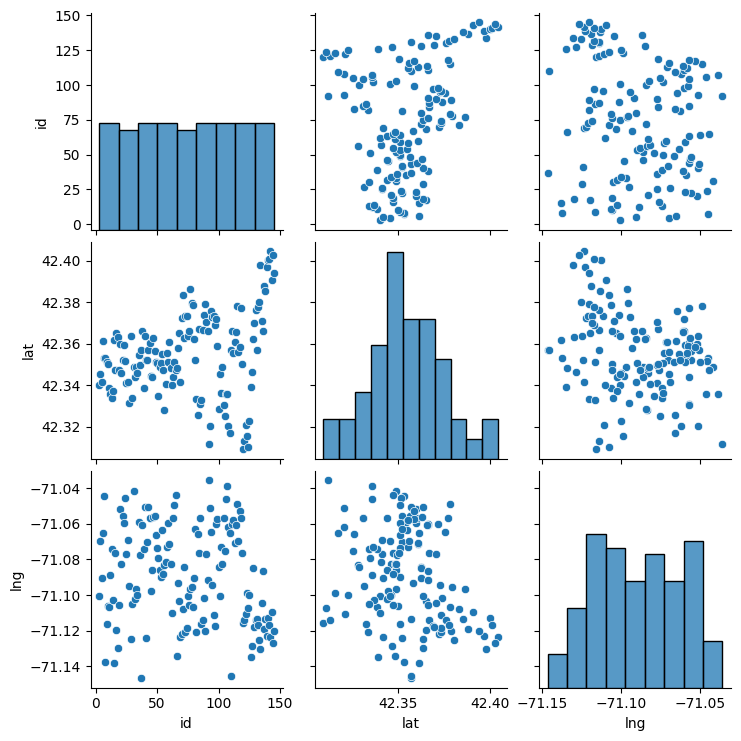

In [14]:
# Узнайте, есть ли какая -либо связь между предикторами данных станций
sns.pairplot(stations);


### ⏸ На основании приведенного выше графика, вы заметите какие -либо узнаваемые отношения между любыми столбцами?

#### A. Широта и долгота прямо пропорциональны друг другу.
#### B. Широта и долгота обратно пропорциональны друг другу.
#### C. Это случайно.Кажется, нет никакой связи между широтой и долготой.



In [15]:
### edtest (test_chow2) ###
# Отправьте выбор ответа в качестве строки ниже (например, если вы выберете опцию A, поместите «a»)
answer2 = 'C'


## Построение соотношения полов вклосипедистов в виде гистограммы

В этой строке мы используем функцию np.unique из библиотеки NumPy для получения уникальных значений столбца 'gender' из объекта DataFrame trips, а также их количества. return_counts=True указывает на то, что мы хотим получить именно количество уникальных значений.

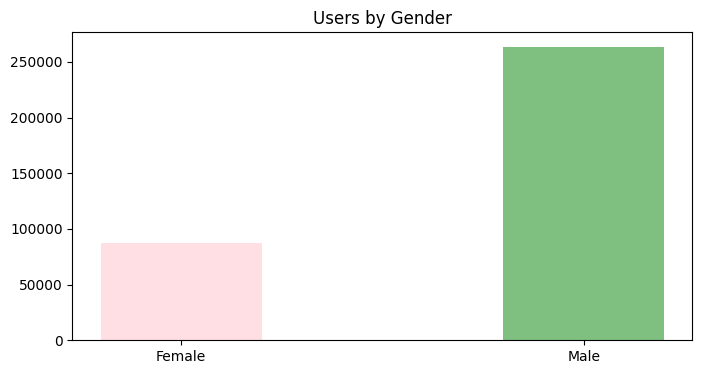

In [16]:
# Получите уникальное количество велосипедистов для мужчин и женщин
gender_counts = np.unique(trips['gender'].values, return_counts=True)


# Здесь мы создаем объект fig, ax для построения графика, используя функцию subplots из библиотеки Matplotlib.
# fig представляет собой общий контейнер для графиков, а ax - объект, на котором мы будем строить график.
fig, ax = plt.subplots(1,1, figsize=(8, 4))
# Затем мы используем метод bar для построения гистограммы. 
# range(2) создает последовательность из двух элементов (0 и 1), 
# которая будет использоваться для задания позиций столбцов на гистограмме. width=0.5 указывает на ширину столбцов, 
# height=gender_counts[1] определяет высоту столбцов на основе количества, 
# а color задает цвета столбцов (розовый и зеленый). alpha=0.5 устанавливает прозрачность гистограммы.
ax.bar(range(2), width=0.4, height = gender_counts[1], color=['pink', 'green'], alpha = 0.5 )
ax.set_xticks([0, 1])
ax.set_xticklabels(gender_counts[0])
ax.set_title('Users by Gender');
#В этих строках мы настраиваем метки оси x и заголовок графика. set_xticks задает позиции меток оси x ([0, 1]), 
# и set_xticklabels устанавливает сами метки на основе уникальных значений полов из gender_counts[0]. 
# set_title задает заголовок для графика.


### ⏸ на основе сюжета выше, кто больше использует велосипеды, мужчины или женщины?
#### Женщина
#### B. Мужчины
#### C. не могу сказать

In [17]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'B'


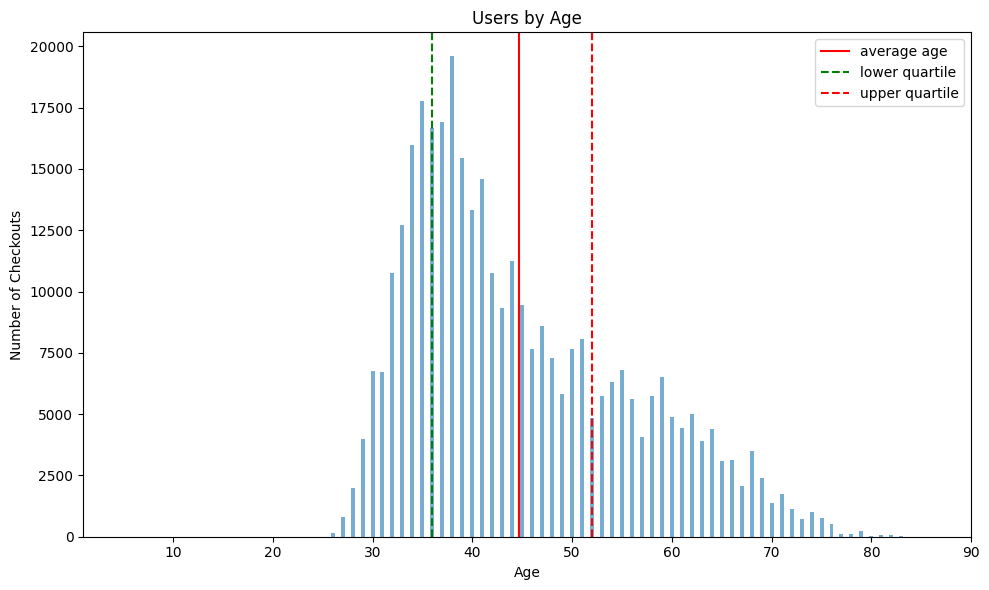

In [18]:
#Построение гистограммы использования велосипедов в зависимости от возраста велосипедистов
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# Создание объекта графика и осей (Figure и Axes) с размерами (10, 6) дюймов.

age_counts = np.unique(trips['age'], return_counts=True)
# Получение уникальных значений возраста из столбца 'age' и их количества.

ax.bar(age_counts[0], age_counts[1], align='center', width=0.4, alpha=0.6)
# Создание столбчатой диаграммы, где ось x - значения возраста, ось y - количество проверок.
# Прямоугольники на графике имеют ширину 0.4, выравниваются по центру и имеют прозрачность 0.6.

ax.axvline(x=np.mean(age_col), color='red', linestyle='-', label='average age')
# Добавление вертикальной линии на график, обозначающей средний возраст, с красным цветом и меткой 'average age'.

ax.axvline(x=np.percentile(age_col, 25), color='green', linestyle='--', label='lower quartile')
# Добавление вертикальной пунктирной линии на график, обозначающей нижний квартиль возраста, с красным цветом и меткой 'lower quartile'.

ax.axvline(x=np.percentile(age_col, 75), color='red', linestyle='--', label='upper quartile')
# Добавление вертикальной пунктирной линии на график, обозначающей верхний квартиль возраста, с красным цветом и меткой 'upper quartile'.

ax.set_xlim([1, 90])
# Установка пределов (минимального и максимального значений) оси x в диапазоне от 1 до 90.

ax.set_xlabel('Age')
# Установка метки для оси x - 'Age'.

ax.set_ylabel('Number of Checkouts')
# Установка метки для оси y - 'Number of Checkouts'.

ax.legend()
# Добавление легенды на график - обозначение для каждой линии.

ax.set_title('Users by Age')
# Установка заголовка для графика - 'Users by Age'.

plt.tight_layout()
# Улучшение отображения графика для избежания перекрытия меток и элементов графика.



### ⏸ на основе сюжета выше, кто использует велосипеды больше, люди старшего возраста или молодые люди?
#### A. Те которые старше
#### B. Младшие

In [19]:
### edTest(test_chow4) ###
# Отправьте выбор ответа в качестве строки ниже (например, если вы выберете опцию A, поместите «A»)
answer4 = 'B'


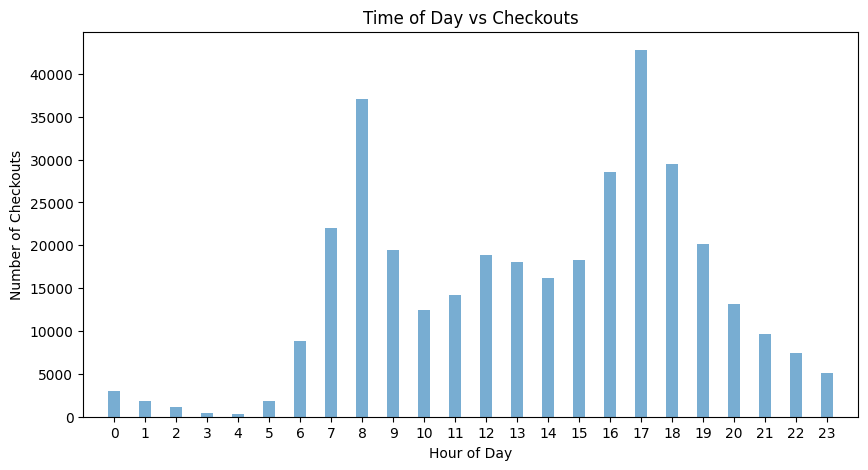

In [20]:
# Получите часовые проверки велосипедов
check_out_hours = trips['start_date'].apply(lambda s: int(s[-8:-6]))

# Построение велосипедных оформлений по часам
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')
plt.show()


1. fig, ax = plt.subplots(1, 1, figsize=(10, 5)): Эта строка кода создает объект фигуры и объект оси. fig содержит объект фигуры, а ax представляет объект оси. Функция plt.subplots(1, 1) создает одну подплощадку, а figsize=(10, 5) задает размер фигуры 10 единиц в ширину и 5 единиц в высоту.

2. check_out_counts = np.unique(check_out_hours, return_counts=True): Здесь np.unique(check_out_hours, return_counts=True) вычисляет уникальные элементы в массиве check_out_hours и возвращает как уникальные значения, так и соответствующие им подсчеты. Результат сохраняется в переменной check_out_counts.

3. ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6): Эта строка кода создает гистограмму с помощью функции bar объекта ax. Она принимает четыре основных аргумента:
   - check_out_counts[0] представляет собой значения x для баров, которые соответствуют уникальным часам суток.
   - check_out_counts[1] представляет собой высоту столбиков, что соответствует количеству выходов из магазина.
   - align='center' указывает, что столбики должны быть центрированы по соответствующим значениям x.
   - width=0.4 устанавливает ширину каждой полосы в 0.4 единицы.
   - alpha=0.6 устанавливает прозрачность полос на 0.6 (60% непрозрачности), что позволяет частично видеть подстилающую сетку.

4. ax.set_xlim([-1, 24]): Этот код устанавливает границы оси x графика в диапазоне от -1 до 24. Это гарантирует, что на оси x будут видны все часы суток.

5. ax.set_xticks(range(24)): Функция set_xticks устанавливает метки оси x в позиции, обозначающие каждый час суток, от 0 до 23. Функция range(24) формирует список чисел от 0 до 23.

6. ax.set_xlabel('Час дня'): Этот код устанавливает метку оси x в виде 'Hour of Day'.

7. ax.set_ylabel('Number of Checkouts'): Аналогичным образом в этой строке устанавливается метка оси y как 'Number of Checkouts'.

8. ax.set_title('Время дня против количества касс'): Функция set_title устанавливает заголовок графика как 'Time of Day vs Checkouts'.

9. plt.show(): Наконец, эта строка выводит график на экран.

### ⏸ на основе сюжета выше, когда самый большой час пик?

In [21]:
### edtest (test_chow5) ###
# Отправить целочисленное значение ниже в кавычках
answer5 = '17'


#### БОЛЬШЕ ВОПРОСОВ?

Здесь не было много вопросов.
1. По каким причинам используются велосипеды? Отдых, трафик или польза для здоровья?
2. Использование больше в будние дни или выходные?
3. Люди используют велосипеды больше в Бостоне или Кембридже?


In [22]:
stations.head(2)

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing


In [23]:
trips.head(2)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,gender,age
0,1,8,Closed,9,2011-07-28 10:12:00,23.0,2011-07-28 10:12:00,23.0,B00468,Registered,'97217,Male,45.0
1,2,9,Closed,220,2011-07-28 10:21:00,23.0,2011-07-28 10:25:00,23.0,B00554,Registered,'02215,Male,55.0


In [24]:
stations[['municipal']].value_counts()

municipal 
Boston        97
Cambridge     28
Somerville    12
Brookline      5
dtype: int64

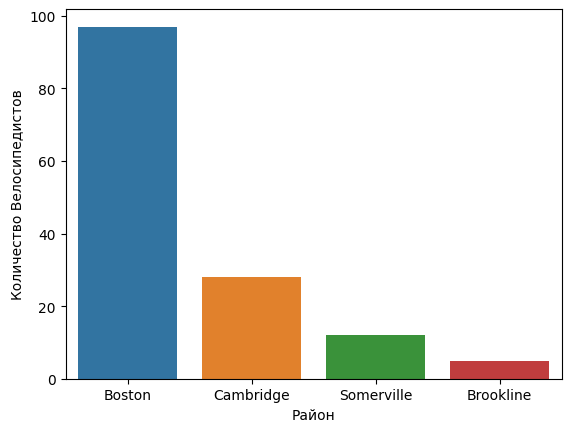

In [25]:

municipal_counts = stations['municipal'].value_counts()
sns.barplot(x=municipal_counts.index, y=municipal_counts.values)
# добавляем подписи осей

plt.xlabel('Район')
plt.ylabel('Количество Велосипедистов')
plt.show()

### **Моделирование данных**
Есть некоторые вопросы, на которые нельзя ответить с помощью простых методов графика.Это требует объединения разных переменных.

1. Как демография пользователя влияет на продолжительность, которую используются велосипеды?Или где их проверяют?
2. Как погода или условия движения влияют на использование велосипедов?
3. Как характеристики местоположения станции влияют на количество проверяемых велосипедов?



Давайте попробуем ответить на вопрос: *Как расстояние от центра города влияет на использование велосипеда? * 

In [26]:
stations.head(2)

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing


In [29]:
trips.head(2)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,gender,age
0,1,8,Closed,9,2011-07-28 10:12:00,23.0,2011-07-28 10:12:00,23.0,B00468,Registered,'97217,Male,45.0
1,2,9,Closed,220,2011-07-28 10:21:00,23.0,2011-07-28 10:25:00,23.0,B00554,Registered,'02215,Male,55.0


In [ ]:
# # Вспомогательная функция в Helper.py для вычисления расстояния велосипеда от центра города
# # Он возвращает данные о данных, который имеет столбец расстояния заказа от центра
# from scipy.spatial.distance import euclidean
# counts_df = euclidean(stations[['lat']], stations[['lng']])

# # Take a quick look at the dataframe
# counts_df.head()


In [ ]:
# Let us use a straight line y = ax + b to model the relation 
# between the number of checkouts and distance to the city center

beta0 = 4394
beta1 = -1175

y_pred = beta0 + beta1 * counts_df['dist_to_center'].values


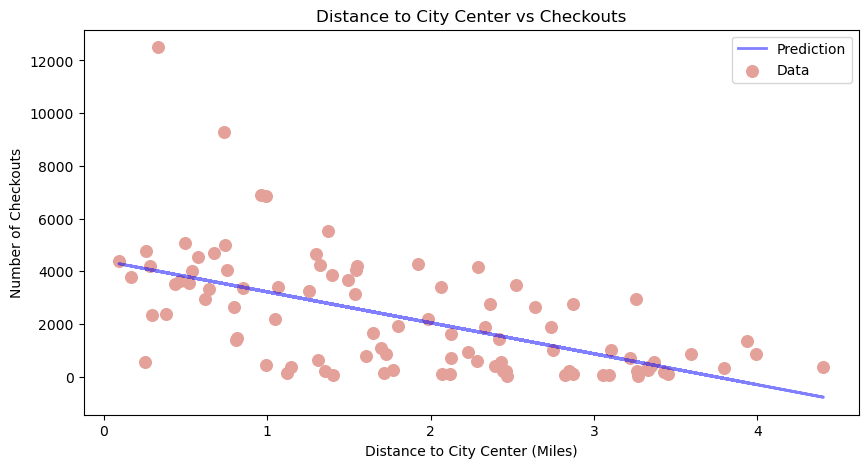

In [ ]:
# Plotting the true data and the prediction
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(counts_df['dist_to_center'].values, counts_df['checkouts'].values, label='Data', s=70, c='#e4a199')
ax.plot(counts_df['dist_to_center'].values, y_pred, c='blue', alpha=0.5, linewidth=2, label='Prediction')
ax.set_xlabel('Distance to City Center (Miles)')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Distance to City Center vs Checkouts');
ax.legend();


### ⏸ Based on our "linear" model, what would most likely be the number of checkouts for a distance of 2.5 miles from the city center?
#### A. 45000
#### B. 12530
#### C. 1450
#### D. 650

In [ ]:
### edTest(test_chow6) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer6 = 'C'
